# cyREST Cookbook for Python Users

by Keiichiro Ono

Ver. 0.0.3

## Introduction
This is a collection of small sample code to call basic cyREST API.

## IMPORTANT: Please Try py2cytoscape
Using raw REST API is OK, but you can use py2cytoscape wrapper to call it.  You can write your code more Pythonic-way!

* [py2cytoscape Project Web Site](https://github.com/idekerlab/py2cytoscape)

In [1]:
import requests
import json
from IPython.display import display
from IPython.display import Image

# Basic Setup
PORT_NUMBER = 1234
BASE = 'http://localhost:' + str(PORT_NUMBER) + '/v1/'
HEADERS = {'Content-Type': 'application/json'}

# Utility function to print result (JSON Printer)
def jp(data):
    print(json.dumps(data, indent=4))

## 0. Start from scratch: Delete current session

In [2]:
res = requests.delete(BASE + 'session')
jp(res.json())

{
    "message": "New session created."
}


## 1. Load a network from file / URL

In [3]:
# URL Parameters
url_params = {
    'source': 'url',
    'collection': 'Your Collection Name'
}

# Array of data source.  URL of the file (remote or local) 
network_files = [
    'http://chianti.ucsd.edu/cytoscape-data/galFiltered.sif'
    # And of course, you can add as many files as you need...
]

# Load network from URLs
res = requests.post(BASE + 'networks', params=url_params, data=json.dumps(network_files), headers=HEADERS)
jp(res.json())

suid = res.json()[0]['networkSUID'][0]

# Make a utility to get first SUID
def get_suid(response):
    return res.json()[0]['networkSUID'][0]

[
    {
        "source": "http://chianti.ucsd.edu/cytoscape-data/galFiltered.sif", 
        "networkSUID": [
            68820
        ]
    }
]


## 2. Get the current network view as a PNG image (embedded)

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


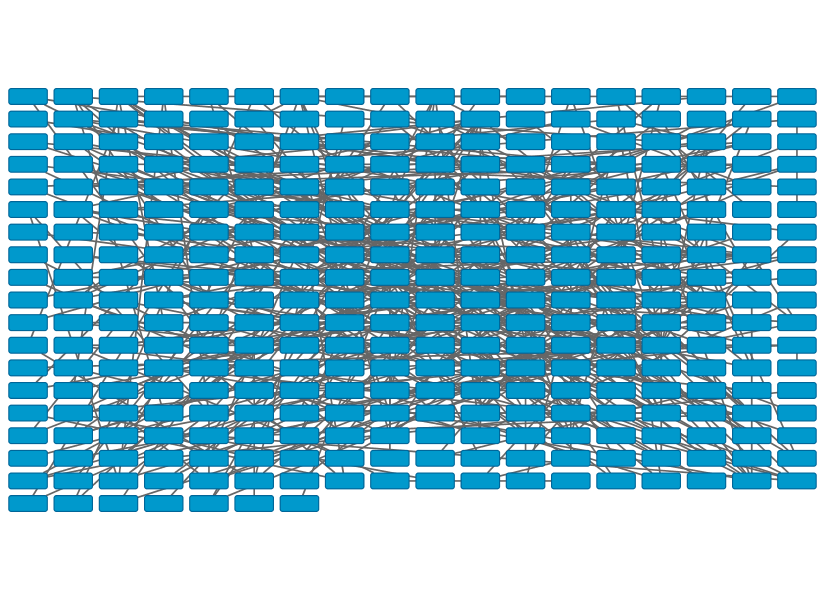

In [4]:
# Let's make a utility function
def show(network_id):
    url = BASE+'networks/' + str(network_id) + '/views/first.png'
    print('Your image is available here: ' + url)
    display(Image(url=url, embed=True))

# Call it!
show(suid)

## 3. Get list of available layout algorithms

In [5]:
res = requests.get(BASE + 'apply/layouts')
jp(res.json())

[
    "attribute-circle", 
    "stacked-node-layout", 
    "degree-circle", 
    "circular", 
    "attributes-layout", 
    "kamada-kawai", 
    "force-directed", 
    "grid", 
    "hierarchical", 
    "fruchterman-rheingold", 
    "isom"
]


## 4. Apply layout

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


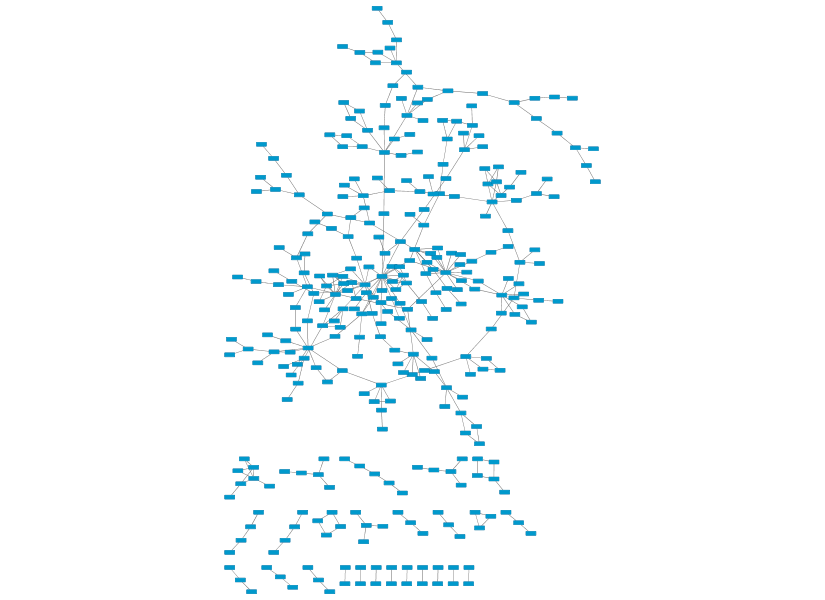

In [6]:
res = requests.get(BASE + 'apply/layouts/force-directed/' + str(suid))
show(suid)

## 5. Get all Visual Style Names

In [7]:
res = requests.get(BASE + 'styles')
jp(res.json())

[
    "default", 
    "Minimal", 
    "Nested Network Style", 
    "Big Labels", 
    "Sample1", 
    "Ripple", 
    "Solid", 
    "Universe", 
    "Directed", 
    "default black"
]


## 6. Apply a Visual Style to a network view

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


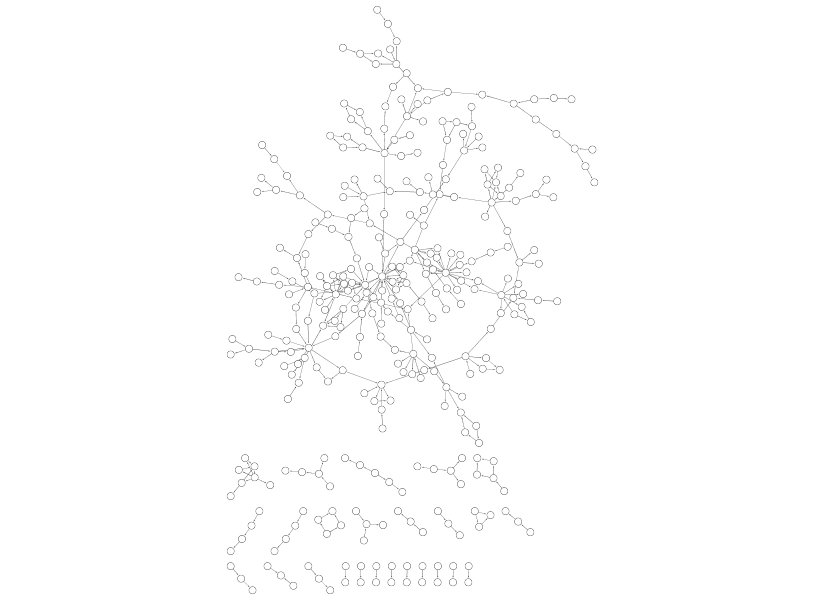

In [8]:
res = requests.get(BASE + 'apply/styles/Directed/' + str(suid))
show(suid)

## 7. Get all details of a Visual Style

In [9]:
res = requests.get(BASE + 'styles/Directed')
#jp(res.json())

## 8. Get all default values of a Visual Style

In [10]:
res = requests.get(BASE + 'styles/Directed/defaults')
#jp(res.json())

## 9. Get all mappings for a Visual Style

In [11]:
res = requests.get(BASE + 'styles/Directed/mappings')
jp(res.json())

[
    {
        "mappingType": "passthrough", 
        "visualProperty": "NODE_LABEL", 
        "mappingColumnType": "String", 
        "mappingColumn": "name"
    }, 
    {
        "mappingType": "passthrough", 
        "visualProperty": "EDGE_LABEL", 
        "mappingColumnType": "String", 
        "mappingColumn": "interaction"
    }
]


## 10. Change default value(s) of a Visual Style

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


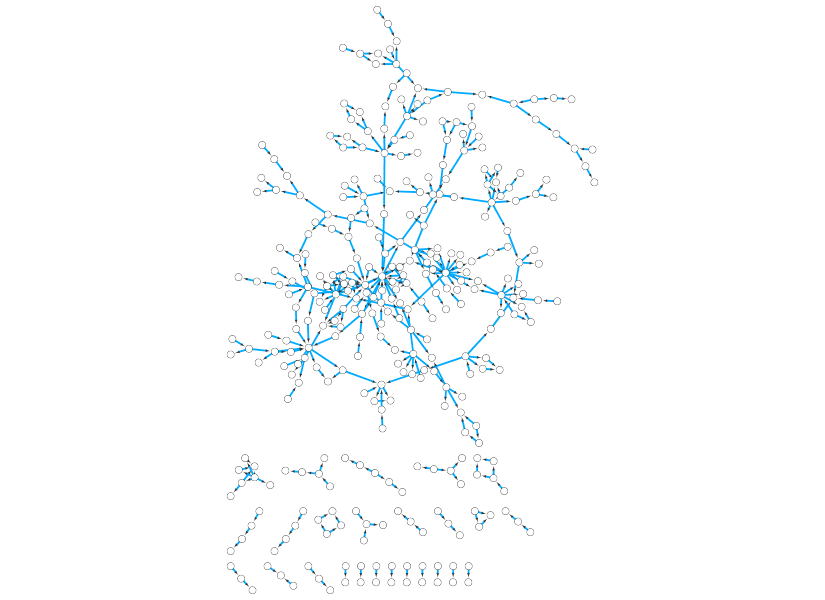

In [12]:
# Simply define a key-value pairs of visual properties
new_defaults = [
    {
        'visualProperty': 'EDGE_WIDTH',
        'value': 12
    },
    {
        'visualProperty': 'EDGE_STROKE_UNSELECTED_PAINT',
        'value': '#00abff'
    }
]

res = requests.put(BASE + 'styles/Directed/defaults', data=json.dumps(new_defaults), headers=HEADERS)
show(suid)

## 11. Get network view object IDs

In [13]:
res = requests.get(BASE + 'networks/' + str(suid) + '/views')
jp(res.json())
view_id = res.json()[0]

[
    69523
]


## 12. Get a view object in Cytoscape.js format

In [14]:
view_url = BASE + 'networks/' + str(suid) + '/views/' + str(view_id)

res = requests.get(view_url)
cyjs_network = res.json()
# jp(cyjs_network)

## 13. Set value(s) to a view object

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


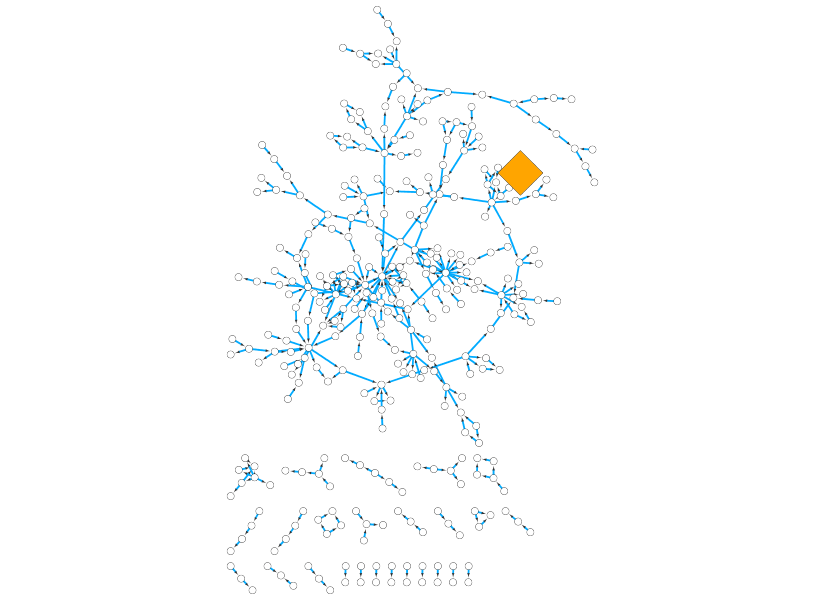

In [15]:
# Pick a node from the network
node_suid = cyjs_network['elements']['nodes'][0]['data']['SUID']

new_values = [
    {
        'visualProperty': 'NODE_WIDTH',
        'value': 300
    },
    {
        'visualProperty': 'NODE_HEIGHT',
        'value': 300
    },
    {
        'visualProperty': 'NODE_FILL_COLOR',
        'value': 'orange'
    },
    {
        'visualProperty': 'NODE_SHAPE',
        'value': 'diamond'
    }
]

res = requests.put(view_url + '/nodes/' + str(node_suid), data=json.dumps(new_values), headers=HEADERS)
show(suid)

In [16]:
# Update network view values
scale_url = view_url + '/network/NETWORK_SCALE_FACTOR'
res = requests.get(scale_url)

print(scale_url)
jp(res.json())

new_values = [
    {
        'visualProperty': 'NETWORK_BACKGROUND_PAINT',
        'value': '#aaaaaa'
    },
    {
        'visualProperty': 'NETWORK_SCALE_FACTOR',
        'value': 2.7
    }
]

res = requests.put(view_url + '/network', data=json.dumps(new_values), headers=HEADERS)

http://localhost:1234/v1/networks/68820/views/69523/network/NETWORK_SCALE_FACTOR
{
    "visualProperty": "NETWORK_SCALE_FACTOR", 
    "value": 0.15035125739845132
}


## 14. Select/ Deselect a node

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


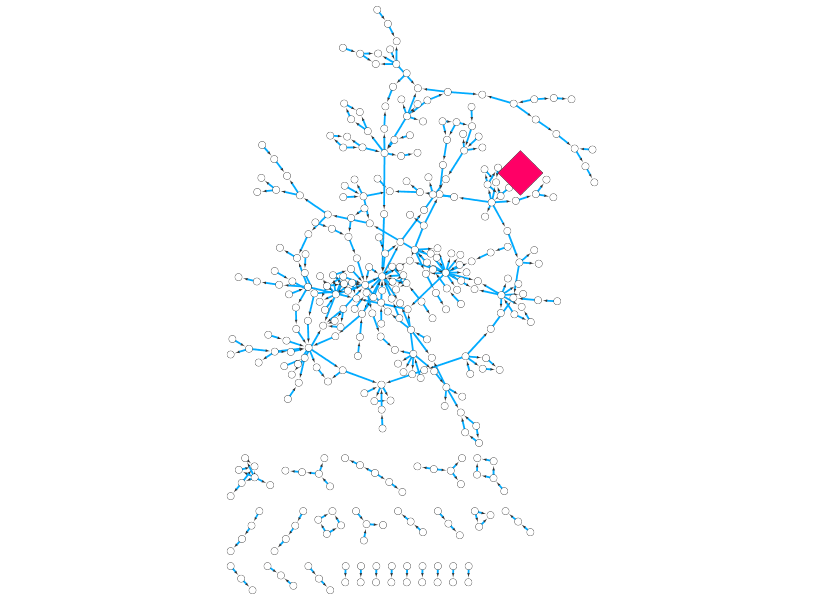

In [17]:
# Essentially, this is just a new value in selection
new_values = [
    {
        'SUID': node_suid,
        'value': True
    }
]

res = requests.put(BASE + 'networks/' + str(suid) + '/tables/defaultnode/columns/selected', data=json.dumps(new_values), headers=HEADERS)
show(suid)

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


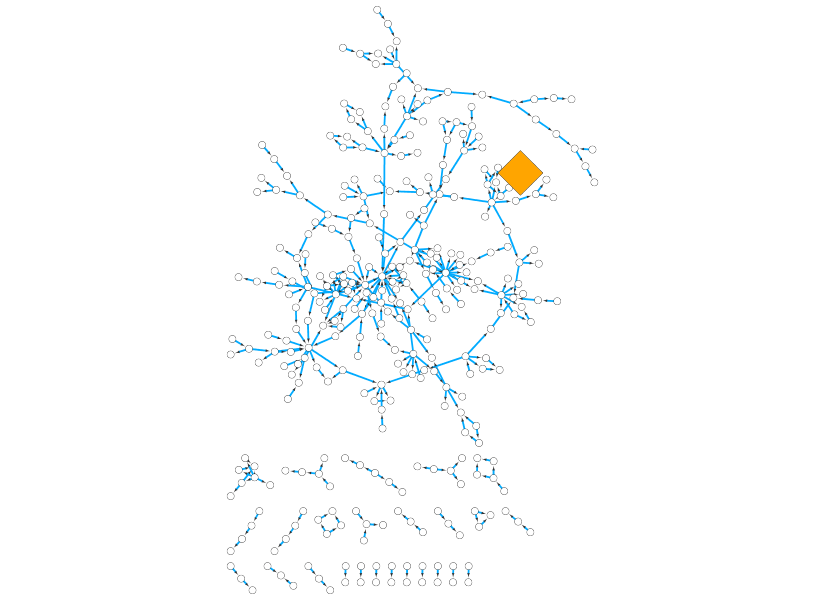

In [18]:
# Deselect
new_values = [
    {
        'SUID': node_suid,
        'value': False
    }
]

res = requests.put(BASE + 'networks/' + str(suid) + '/tables/defaultnode/columns/selected', data=json.dumps(new_values), headers=HEADERS)
show(suid)

## 15. Set a value to the entire column
### New in 0.9.11

Your image is available here: http://localhost:1234/v1/networks/68820/views/first.png


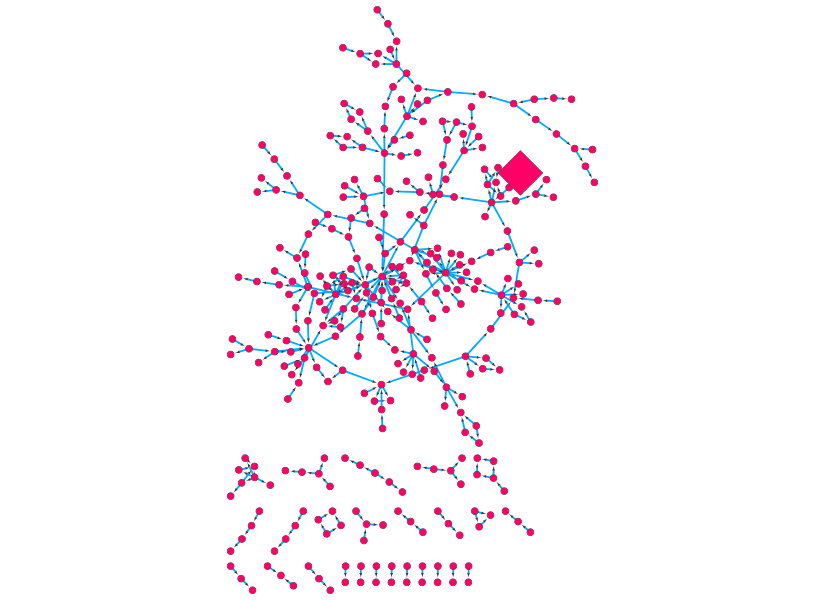

In [19]:
res = requests.put(BASE + 'networks/' + str(suid) + '/tables/defaultnode/columns/selected?default=true', data={}, headers=HEADERS)
show(suid)

## 16. Create Visual Mappings

In [20]:
# TODO

## 17. Select nodes or edges by query

In [21]:
matched_url = BASE + 'networks/' +str(suid) + '/nodes?column=selected&query=true'
res = requests.get(matched_url)

print(matched_url)

# This is an array
result = res.json()
print('Number of selected nodes = ' + str(len(result)))

http://localhost:1234/v1/networks/68820/nodes?column=selected&query=true
Number of selected nodes = 331


## 18. Upload new values to table

In [22]:
# Prepare new table data.  This format is a bit redundant, but is a standard JSON way to store values.
new_table_data = {
    'key': 'name',  # Key in the existing table.  In this case, "name" column in default node table.
    'dataKey': 'uniprot_id',  # Mapping key ih the new data.  If this value maches to the "name" value, data will be assigned to the row.
    'data': [
         {
            'uniprot_id': 'YBR190W',
            'sgd':'S000000394',
            'description': 'Dubious open reading frame',
            'molecular_weight': 11036.8
        }, {
            'uniprot_id': 'YOL059W',
            'sgd':'S000005420',
            'description': 'NAD-dependent glycerol 3-phosphate dehydrogenase',
            'molecular_weight': 49418.2
        }
    ]
}


# PUT the new data to default node table
res = requests.put(BASE + 'networks/' + str(suid) + '/tables/defaultnode', data=json.dumps(new_table_data), headers=HEADERS)

----

# Advanced Features

## Get optional layout parameters

In [23]:
res = requests.get(BASE + 'apply/layouts/force-directed')
jp(res.json())

params= [
    {
        'name': 'defaultNodeMass',
        'value': 10
    },
        {
        'name': 'defaultSpringLength',
        'value': 100
    },
    {
        'name': 'isDeterministic',
        'value': True
    }
]
res = requests.put(BASE + 'apply/layouts/force-directed', data=json.dumps(params), headers=HEADERS)


{
    "parameters": [
        {
            "type": "int", 
            "name": "numIterations", 
            "value": 100, 
            "description": "Number of Iterations"
        }, 
        {
            "type": "double", 
            "name": "defaultSpringCoefficient", 
            "value": 0.0001, 
            "description": "Default Spring Coefficient"
        }, 
        {
            "type": "double", 
            "name": "defaultSpringLength", 
            "value": 50.0, 
            "description": "Default Spring Length"
        }, 
        {
            "type": "double", 
            "name": "defaultNodeMass", 
            "value": 3.0, 
            "description": "Default Node Mass"
        }, 
        {
            "type": "boolean", 
            "name": "isDeterministic", 
            "value": false, 
            "description": "Force deterministic layouts (slower)"
        }, 
        {
            "type": "boolean", 
            "name": "singlePartition", 
           

## Get and Set GUI Panel States

In [24]:
res = requests.get(BASE + 'ui/panels')
jp(res.json())

panel_state = [
    {
        "state": "DOCK", 
        "name": "SOUTH"
    }, 
    {
        "state": "FLOAT", 
        "name": "SOUTH_WEST"
    }
]
res = requests.put(BASE + 'ui/panels', data=json.dumps(panel_state), headers=HEADERS)

[
    {
        "state": "DOCK", 
        "name": "SOUTH"
    }, 
    {
        "state": "HIDE", 
        "name": "EAST"
    }, 
    {
        "state": "DOCK", 
        "name": "WEST"
    }, 
    {
        "state": "FLOAT", 
        "name": "SOUTH_WEST"
    }
]
